In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_answer = pd.read_csv('../data/same-index-separate/answer_' + task_name + '.csv')
df_truth = pd.read_csv('../data/same-index-separate/truth_' + task_name + '.csv').set_index('question')
df_full = df_answer.join(df_truth, on='question', how='inner')

NameError: name 'task_name' is not defined

Text(0.5,1,'Worker Accuracy')

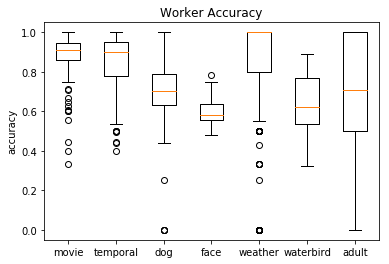

In [3]:
tasks = ['waterbird', 'movie', 'temporal', 'face', 'dog', 'weather_ordinal', 'adult_ordinal']

acc_dict = {}
for task_name in tasks:
    df_answer = pd.read_csv('../data/same-index-separate/answer_' + task_name + '.csv')
    df_truth = pd.read_csv('../data/same-index-separate/truth_' + task_name + '.csv').set_index('question')
    df_full = df_answer.join(df_truth, on='question', how='inner')
    df_full['score'] = (df_full['truth'] == df_full['answer']).astype(int)
    worker_accuracies = df_full[['worker', 'score']].groupby('worker').mean()
#     if task_name == 'weather_ordinal':
#         print(worker_accuracies)
    task_name_reformat = task_name.split('_')[0]
    acc_dict[task_name_reformat] = list(worker_accuracies['score'])
    
fig, ax = plt.subplots()
ax.boxplot(acc_dict.values())
ax.set_xticklabels(acc_dict.keys())
ax.set_ylabel('accuracy')
ax.set_title('Worker Accuracy')



Text(0.5,1,'Worker MAE/range')

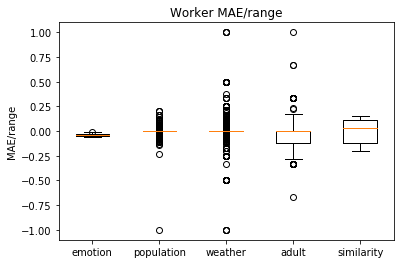

In [4]:
tasks = ['weather_ordinal', 'adult_ordinal', 'emotion', 'similarity', 'population']
remove_outliers = True

acc_dict = {}
for task_name in tasks:
    df_answer = pd.read_csv('../data/same-index-separate/answer_' + task_name + '.csv')
    df_truth = pd.read_csv('../data/same-index-separate/truth_' + task_name + '.csv').set_index('question')
    df_full = df_answer.join(df_truth, on='question', how='inner')
    
    if remove_outliers:
        q25 = df_full['answer'].quantile(.25)
        q75 = df_full['answer'].quantile(.75)
        upper = q75 + 3*(q75 - q25)
        lower = q25 - 3*(q75 - q25)
        df_full = df_full[df_full['answer'] < upper]
        
    max_val = max(df_full['truth'])
    min_val = min(df_full['truth'])
    truth_range = max_val - min_val
    truth_avg = df_full['truth'].mean()
    df_full['score'] = (df_full['answer'] - df_full['truth'])/truth_range
    worker_accuracies = df_full[['worker', 'score']].groupby('worker').mean()
    task_name_reformat = task_name.split('_')[0]
    acc_dict[task_name_reformat] = list(worker_accuracies['score'])
    
fig, ax = plt.subplots()
ax.boxplot(acc_dict.values())
ax.set_xticklabels(acc_dict.keys())
ax.set_ylabel('MAE/range')
ax.set_title('Worker MAE/range')